In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
deformable_results = pd.read_csv('../results/deffcn.csv')
inception_results = pd.read_csv('../results/inceptiontime.csv')

results = pd.concat([deformable_results, inception_results])
results = results.groupby(by=['model', 'dataset'], as_index=False).mean()
results = results.drop(['exp', 'time'], axis=1)
results

,model,dataset,acc,f1,recall,precision
0,deffcn,ACSF1,0.906000,0.704009,0.690440,0.724400
1,deffcn,Adiac,0.833248,0.751125,0.758821,0.755554
2,deffcn,ArrowHead,0.838857,0.522955,0.499179,0.555902
3,deffcn,BME,0.793333,0.553645,0.513259,0.624444
4,deffcn,Beef,0.800000,0.645941,0.626667,0.721455
...,...,...,...,...,...,...
219,inceptiontime,Wine,0.688889,0.682586,0.688889,0.707925
220,inceptiontime,WordSynonyms,0.657053,0.525696,0.529085,0.571002
221,inceptiontime,Worms,0.792208,0.779653,0.755949,0.818877
222,inceptiontime,WormsTwoClass,0.802597,0.799572,0.801515,0.798963


In [67]:
results_lite = pd.read_csv('../results/results_lite.csv')
results_lite = results_lite.drop(['Inception', 'InceptionTime', 'ResNet', 'ROCKET', 'MultiROCKET', 'LITE', 'LITETime'], axis=1)
results_lite = results_lite[results_lite['dataset'].isin(results['dataset'].value_counts().index)]
results_lite

,dataset,FCN
0,ACSF1,0.896000
1,Adiac,0.844501
5,ArrowHead,0.840000
6,BME,0.844000
7,Beef,0.660000
...,...,...
123,Wine,0.625926
124,WordSynonyms,0.564263
125,Worms,0.776623
126,WormsTwoClass,0.732468


In [68]:
inception_time_order = []
deffcn_order = []

for row in results_lite.values:
    dataset, *_ = row
    inception_time_order.append(results.query(f'model == "inceptiontime" and dataset == "{dataset}"').acc.values[0])
    deffcn_order.append(results.query(f'model == "deffcn" and dataset == "{dataset}"').acc.values[0])

In [69]:
results_lite['DefFCN'] = deffcn_order
results_lite['InceptionTime'] = inception_time_order
results_lite

,dataset,FCN,DefFCN,InceptionTime
0,ACSF1,0.896000,0.906000,0.890000
1,Adiac,0.844501,0.833248,0.769821
5,ArrowHead,0.840000,0.838857,0.800000
6,BME,0.844000,0.793333,0.982667
7,Beef,0.660000,0.800000,0.740000
...,...,...,...,...
123,Wine,0.625926,0.737037,0.688889
124,WordSynonyms,0.564263,0.568966,0.657053
125,Worms,0.776623,0.771429,0.792208
126,WormsTwoClass,0.732468,0.748052,0.802597


In [70]:
def set_color(acc1, acc2):
    colors = []
    for i in range(len(acc1)):
        if acc1[i] > acc2[i]:
            colors.append('blue')
        elif acc2[i] > acc1[i]:
            colors.append('red')
        else:
            colors.append('green')
    return colors

In [71]:
def show_comparinson_plot(m1, m2):
    sns.scatterplot(
        x=results_lite[results_lite[m2] < results_lite[m1]][m2],
        y=results_lite[results_lite[m2] < results_lite[m1]][m1],
        color='blue',
        label=f'Win {len(results_lite[results_lite[m2] < results_lite[m1]][m1])}'
    )

    sns.scatterplot(
        x=results_lite[results_lite[m2] > results_lite[m1]][m2],
        y=results_lite[results_lite[m2] > results_lite[m1]][m1],
        color='red',
        label=f'Loss {len(results_lite[results_lite[m2] > results_lite[m1]][m2])}'
    )

    sns.scatterplot(
        x=results_lite[results_lite[m2] == results_lite[m1]][m2],
        y=results_lite[results_lite[m2] == results_lite[m1]][m2],
        color='green',
        label=f'Tie {len(results_lite[results_lite[m2] == results_lite[m1]][m2])}'
    )

    plt.plot(list(np.arange(0, 1.1, 0.1)), list(np.arange(0, 1.1, 0.1)), color='black', linestyle='dashed')    

    plt.xlabel(m2)
    plt.ylabel(m1)

    plt.text(0.5, 0.01, f'{m2} is better', fontdict={'size': 14})
    plt.text(0.01, 0.97, f'{m1} is better', fontdict={'size': 14})

    plt.legend(loc='lower left')

    plt.show()

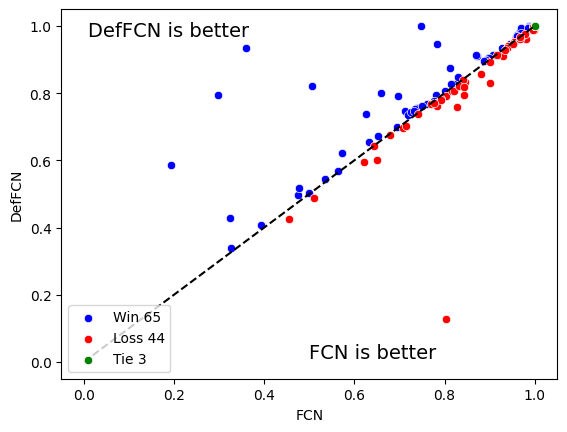

In [72]:
show_comparinson_plot('DefFCN', 'FCN')

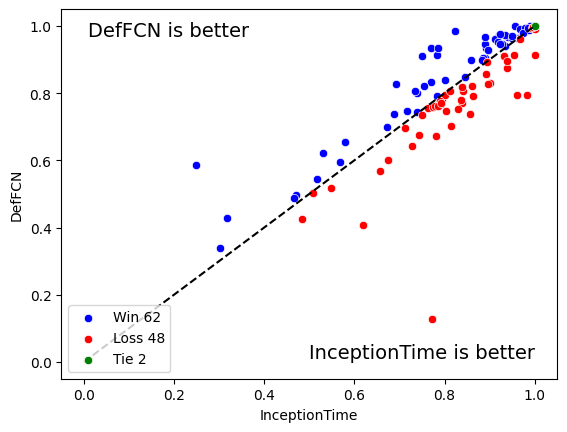

In [73]:
show_comparinson_plot('DefFCN', 'InceptionTime')

In [74]:
results_lite.drop(['dataset'], axis=1).to_csv('results4mcm.csv', index=False)

In [75]:
results_lite

,dataset,FCN,DefFCN,InceptionTime
0,ACSF1,0.896000,0.906000,0.890000
1,Adiac,0.844501,0.833248,0.769821
5,ArrowHead,0.840000,0.838857,0.800000
6,BME,0.844000,0.793333,0.982667
7,Beef,0.660000,0.800000,0.740000
...,...,...,...,...
123,Wine,0.625926,0.737037,0.688889
124,WordSynonyms,0.564263,0.568966,0.657053
125,Worms,0.776623,0.771429,0.792208
126,WormsTwoClass,0.732468,0.748052,0.802597


In [76]:
data_dict = {
    'dataset': np.concatenate([results_lite['dataset'].values, results_lite['dataset'].values, results_lite['dataset'].values]),
    'model': np.concatenate([['FCN'] * 112, ['DefFCN'] * 112, ['InceptionTime'] * 112]),
    'accuracy': np.concatenate([results_lite['FCN'].values, results_lite['DefFCN'].values, results_lite['InceptionTime'].values])
}

results_4_cddiagram = pd.DataFrame(data_dict)
results_4_cddiagram.to_csv('results4cdd.csv', index=False)